                                    Region  Region code             Province  \
0           NATIONAL CAPITAL REGION (NCR)*  PH130000000  1st District b/, c/   
1           NATIONAL CAPITAL REGION (NCR)*  PH130000000  2nd District b/, c/   
2           NATIONAL CAPITAL REGION (NCR)*  PH130000000      3rd District c/   
3           NATIONAL CAPITAL REGION (NCR)*  PH130000000        4th District*   
4  CORDILLERA ADMINISTRATIVE REGION (CAR)*  PH140000000                 Abra   

  Province code Annual Per Capita Poverty Threshold \n(in PhP)  2015u   \
0   PH133900000                                            25,188        
1   PH137400000                                            25,188        
2   PH137500000                                            25,188        
3   PH137600000                                            25,188        
4   PH140100000                                            21,294        

  Annual Per Capita Poverty Threshold \n(in PhP)  2018u   \
0             

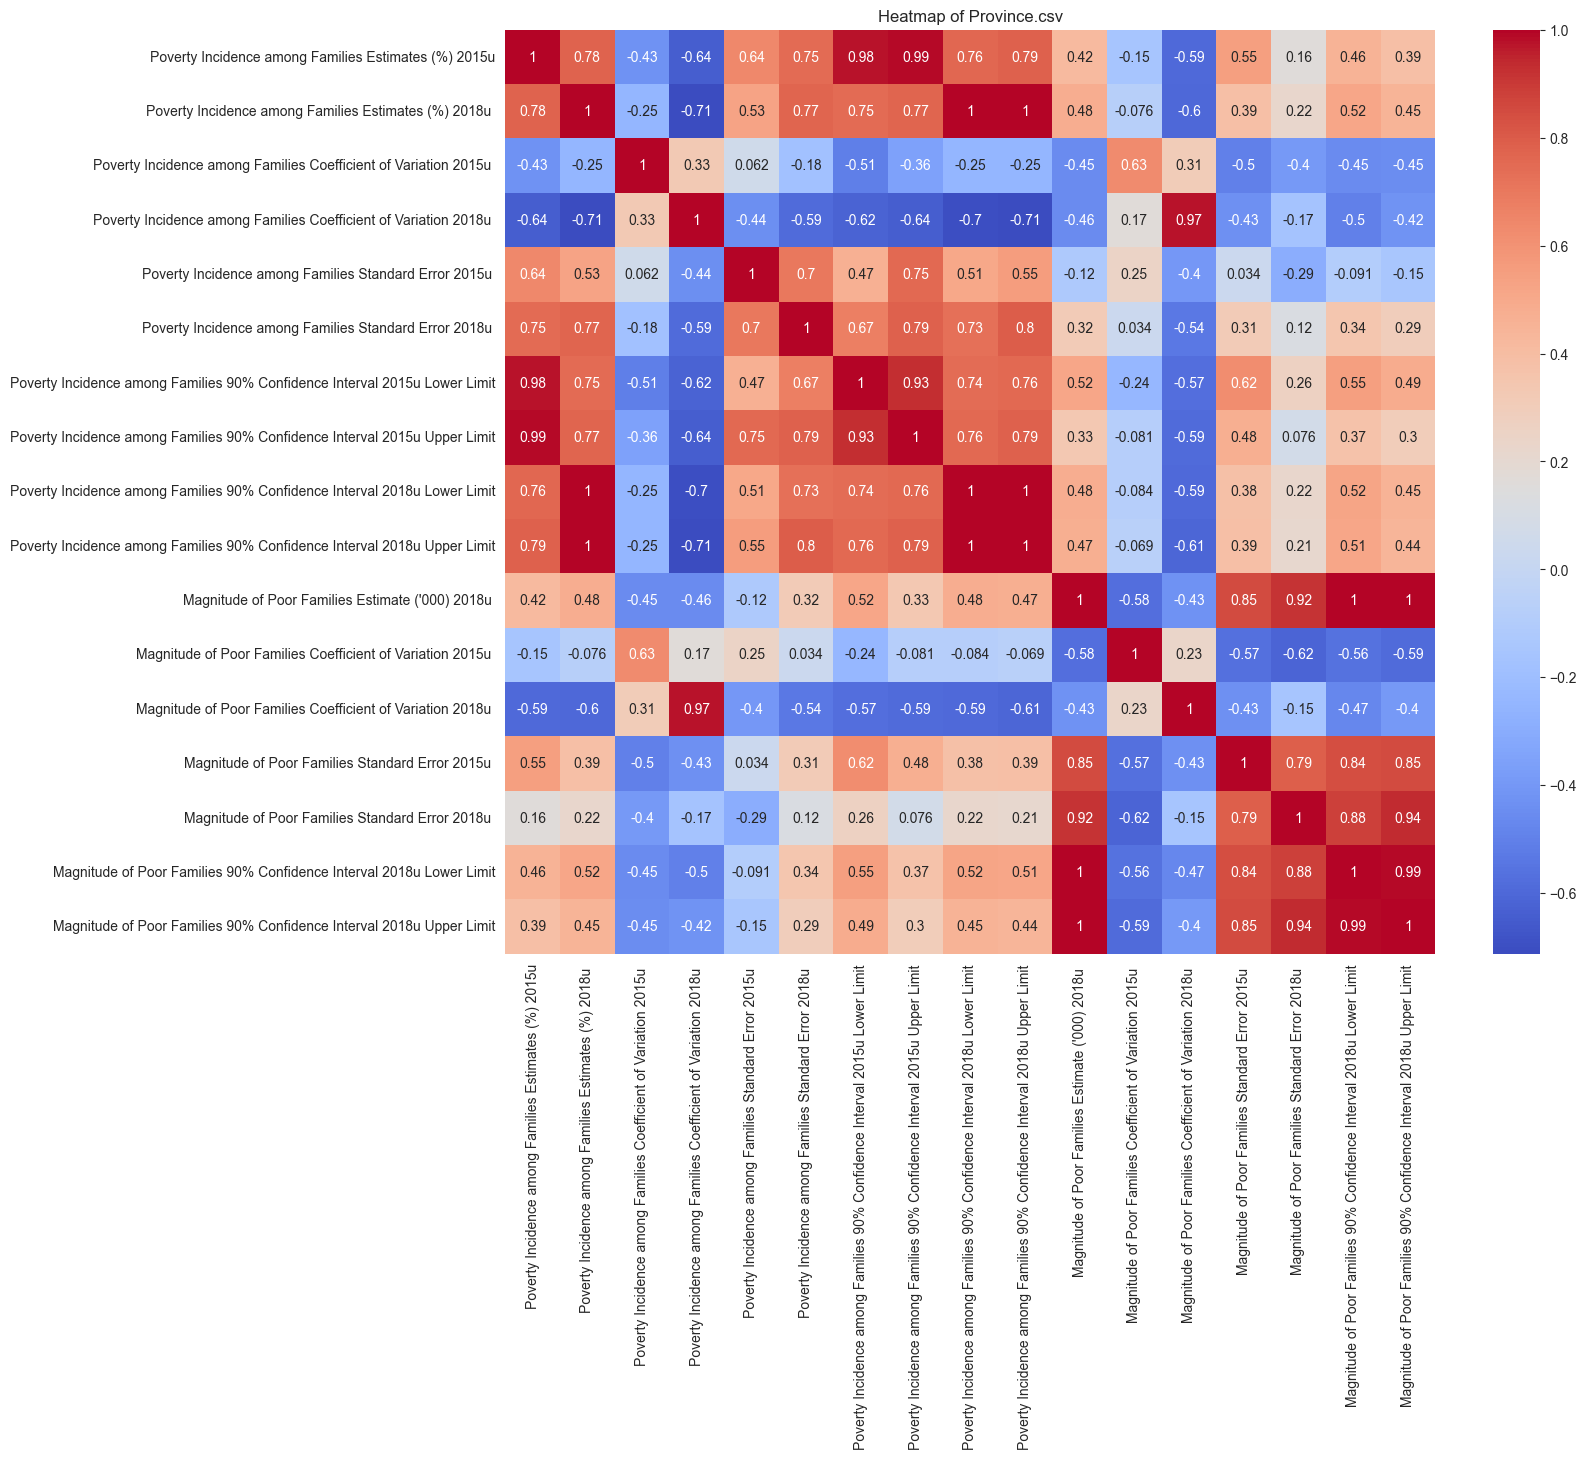

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('Province.csv')

# Display the first few rows of the dataframe to understand its structure
print(df.head())

# Drop columns that are unnamed and likely empty
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Drop the 'Region code' column if it exists
if 'Region code' in df.columns:
    df = df.drop(columns=['Region code'])

# Select only numeric columns for the heatmap
numeric_df = df.select_dtypes(include=['number'])

# Create a heatmap from the numeric dataframe
plt.figure(figsize=(15, 12))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Province.csv')
plt.show()

Index(['Region', 'Region code', 'Province', 'Province code',
       'Annual Per Capita Poverty Threshold \n(in PhP)  2015u',
       'Annual Per Capita Poverty Threshold \n(in PhP)  2018u',
       'Poverty Incidence among Families Estimates (%) 2015u',
       'Poverty Incidence among Families Estimates (%) 2018u',
       'Poverty Incidence among Families Coefficient of Variation 2015u',
       'Poverty Incidence among Families Coefficient of Variation 2018u',
       'Poverty Incidence among Families Standard Error 2015u',
       'Poverty Incidence among Families Standard Error 2018u',
       'Poverty Incidence among Families 90% Confidence Interval 2015u Lower Limit',
       'Poverty Incidence among Families 90% Confidence Interval 2015u Upper Limit',
       'Poverty Incidence among Families 90% Confidence Interval 2018u Lower Limit',
       'Poverty Incidence among Families 90% Confidence Interval 2018u Upper Limit',
       'Magnitude of Poor Families Estimate ('000) 2015u',
       'Ma

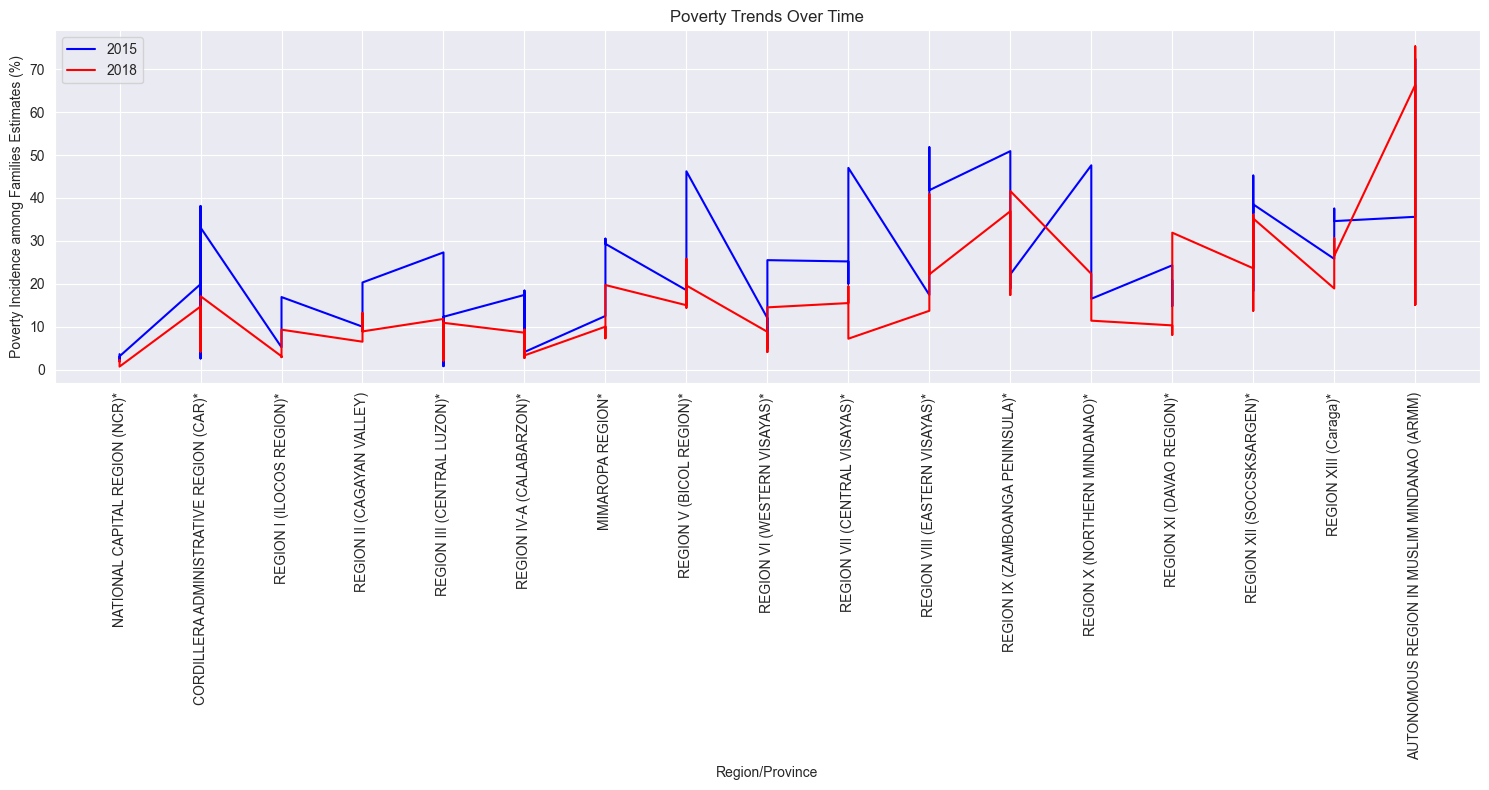

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('Province.csv')

# Strip any leading or trailing spaces from the column names
df.columns = df.columns.str.strip()

# Display the column names to verify the correct names
print(df.columns)

# Convert columns to strings and handle NaN values
df['Region'] = df['Region'].astype(str)
df['Poverty Incidence among Families Estimates (%) 2015u'] = df['Poverty Incidence among Families Estimates (%) 2015u'].astype(float)
df['Poverty Incidence among Families Estimates (%) 2018u'] = df['Poverty Incidence among Families Estimates (%) 2018u'].astype(float)

# Adjust the column names based on the actual names in the dataframe
df_filtered = df[['Region', 'Poverty Incidence among Families Estimates (%) 2015u', 'Poverty Incidence among Families Estimates (%) 2018u']]

# Set the correct region column as the index
df_filtered.set_index('Region', inplace=True)

# Plot the line chart
plt.figure(figsize=(15, 8))
plt.plot(df_filtered.index, df_filtered['Poverty Incidence among Families Estimates (%) 2015u'], label='2015', color='blue')
plt.plot(df_filtered.index, df_filtered['Poverty Incidence among Families Estimates (%) 2018u'], label='2018', color='red')
plt.xlabel('Region/Province')
plt.ylabel('Poverty Incidence among Families Estimates (%)')
plt.title('Poverty Trends Over Time')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [47]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('Province.csv')

# Strip any leading or trailing spaces from the column names
df.columns = df.columns.str.strip()

# Convert columns to appropriate data types
df['Region'] = df['Region'].astype(str)
df['Poverty Incidence among Families Estimates (%) 2015u'] = df['Poverty Incidence among Families Estimates (%) 2015u'].astype(float)
df['Poverty Incidence among Families Estimates (%) 2018u'] = df['Poverty Incidence among Families Estimates (%) 2018u'].astype(float)

# Calculate the difference between 2015 and 2018
df['Difference'] = df['Poverty Incidence among Families Estimates (%) 2015u'] - df['Poverty Incidence among Families Estimates (%) 2018u']

# Check if the poverty incidence is generally decreasing
decreasing = df['Difference'].mean() > 0

# Print the result
print("Is the poverty incidence among families decreasing between 2015 and 2018?", decreasing)

Is the poverty incidence among families decreasing between 2015 and 2018? True
